In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import  StandardScaler
from sklearn.metrics import mean_squared_error

In [9]:
df=pd.read_csv('/Users/palammysurareddy/Downloads/15th, 16th, 17th - svr, dtr, rf,knn 2/HEIGHT & WEIGHT/SOCR-HeightWeight.csv')

In [8]:
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [10]:
df['Weight(Inches)']=df['Weight(Pounds)']*0.423592
df['Height(Feet.Inches)'] = df['Height(Inches)'] // 12 + (df['Height(Inches)'] % 12) / 10

In [11]:
df.describe()

,Index,Height(Inches),Weight(Pounds),Weight(Inches),Height(Feet.Inches)
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421,53.829826,5.795967
std,7217.022701,1.901679,11.660898,4.939463,0.183513
min,1.000000,60.278360,78.014760,33.046428,5.027836
25%,6250.750000,66.704397,119.308675,50.538200,5.670440
50%,12500.500000,67.995700,127.157750,53.863006,5.799570
75%,18750.250000,69.272958,134.892850,57.139532,5.927296
max,25000.000000,75.152800,170.924000,72.402039,6.315280


In [14]:
drop_col=['Index','Height(Inches)','Weight(Pounds)']
df=df.drop(columns=drop_col,axis=1)

In [85]:
df.sample(3)

,Weight(Inches),Height(Feet.Inches)
13072,50.284437,5.729233
6324,53.312400,5.591527
11382,49.885625,5.646549


In [18]:
df.shape

(25000, 2)

In [19]:
df.isna().sum()

Weight(Inches)         0
Height(Feet.Inches)    0
dtype: int64

In [22]:
df.dtypes

Weight(Inches)         float64
Height(Feet.Inches)    float64
dtype: object

In [23]:
df.corr()

,Weight(Inches),Height(Feet.Inches)
Weight(Inches),1.000000,0.499192
Height(Feet.Inches),0.499192,1.000000


In [24]:
df.describe()

,Weight(Inches),Height(Feet.Inches)
count,25000.000000,25000.000000
mean,53.829826,5.795967
std,4.939463,0.183513
min,33.046428,5.027836
25%,50.538200,5.670440
50%,53.863006,5.799570
75%,57.139532,5.927296
max,72.402039,6.315280


<Axes: xlabel='Height(Feet.Inches)'>

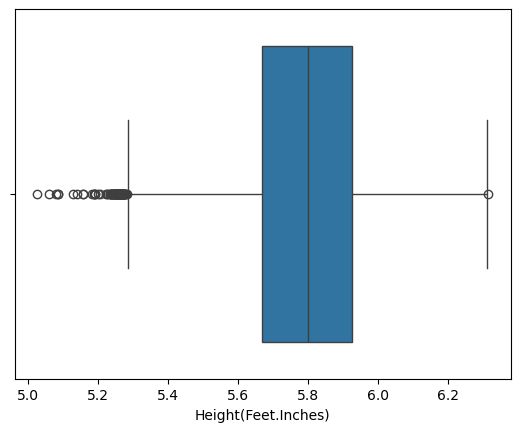

In [26]:
sns.boxplot(x=df['Height(Feet.Inches)'])

<Axes: xlabel='Weight(Inches)'>

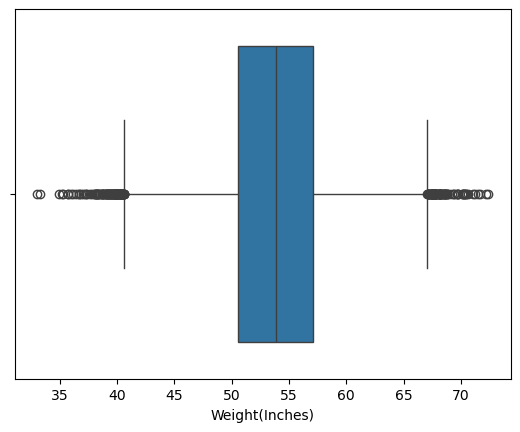

In [31]:
sns.boxplot(x=df['Weight(Inches)'])

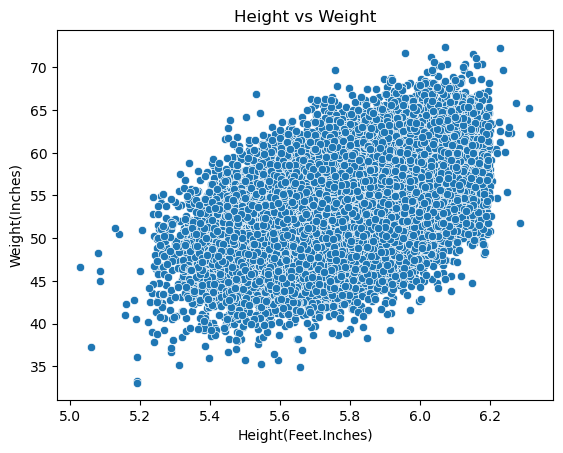

In [33]:
x=df['Height(Feet.Inches)']
y=df['Weight(Inches)']

sns.scatterplot(x=x,y=y)
plt.title('Height vs Weight')
plt.xlabel('Height(Feet.Inches)')
plt.ylabel('Weight(Inches)')
plt.show()

In [34]:
df.sample(3)

,Weight(Inches),Height(Feet.Inches)
1285,53.990825,5.767958
4803,56.962153,5.687663
4543,48.892768,5.805629


In [35]:
x=df.iloc[:,1]
y=df.iloc[:,0]

In [36]:
x

0        5.578331
1        6.151521
2        5.939874
3        5.821660
4        5.778781
           ...   
24995    5.950215
24996    5.454826
24997    5.469855
24998    5.752918
24999    5.887761
Name: Height(Feet.Inches), Length: 25000, dtype: float64

In [37]:
y

0        47.862719
1        57.814928
2        64.820971
3        60.292137
4        61.123097
           ...    
24995    49.997072
24996    50.912878
24997    50.096320
24998    56.027751
24999    52.895712
Name: Weight(Inches), Length: 25000, dtype: float64

In [38]:
df.columns[1]

'Height(Feet.Inches)'

In [39]:
df.columns[0]

'Weight(Inches)'

In [42]:
scaler_x = StandardScaler()
x_scaled = scaler_x.fit_transform(x.values.reshape(-1,1))


scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [44]:
print('shape of triring data')
print(x_train.shape)
print(y_train.shape)

shape of triring data
(20000,)
(20000,)


In [45]:
print('shape of test data')
print(x_test.shape)
print(y_test.shape)

shape of test data
(5000,)
(5000,)


In [55]:
x_train_2d = x_train.values.reshape(-1, 1)
y_train_2d = y_train.values.reshape(-1, 1)

x_test = x_test.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

print("Shape of training data (X):", x_train_2d.shape)
print("Shape of training data (y):", y_train_2d.shape)
print("Shape of testing data (X):", x_test_2d.shape)
print("Shape of testing data (y):", y_test_2d.shape)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [49]:
# Reshape training data
x_train_2d = x_train.values.reshape(-1, 1)
y_train_2d = y_train.values.reshape(-1, 1)

# Reshape testing data
x_test_2d = x_test.values.reshape(-1, 1)
y_test_2d = y_test.values.reshape(-1, 1)

print("Shape of training data (X):", x_train_2d.shape)
print("Shape of training data (y):", y_train_2d.shape)
print("Shape of testing data (X):", x_test_2d.shape)
print("Shape of testing data (y):", y_test_2d.shape)

Shape of training data (X): (20000, 1)
Shape of training data (y): (20000, 1)
Shape of testing data (X): (5000, 1)
Shape of testing data (y): (5000, 1)


In [63]:
lr=LinearRegression()
lr

LinearRegression()

In [64]:
lr.fit(x_train_2d,y_train_2d)

LinearRegression()

In [65]:
y_pred=lr.predict(x_test_2d)
y_pred[:10]

array([[52.2441727 ],
       [56.88360863],
       [52.82729652],
       [52.6944627 ],
       [48.11764177],
       [49.43673821],
       [56.31615852],
       [56.28620932],
       [58.59486779],
       [58.89081755]])

In [66]:
y_test_2d[:10]

array([[56.84740189],
       [60.00676283],
       [47.28299105],
       [50.08200227],
       [43.4616829 ],
       [45.02117921],
       [52.12646905],
       [51.39488331],
       [71.53664055],
       [52.28417236]])

In [69]:
y_pred_rfr=(x_test_2d)
y_pred_rfr[:10]

array([[5.675233],
       [6.023626],
       [5.719022],
       [5.709047],
       [5.365356],
       [5.464412],
       [5.981014],
       [5.978765],
       [6.152131],
       [6.174355]])

In [70]:
mean_squared_error(y_pred_rfr,y_test_2d)

2324.918037734734

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

# Define hyperparameters to tune
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

# Create a Linear Regression model
model_lr = LinearRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(model_lr, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(x_train_2d, y_train_2d)

# Print the best parameters and best MSE score
print("Best Parameters:", grid_search.best_params_)
print("Best Negative MSE Score:", grid_search.best_score_)

Best Parameters: {'copy_X': True, 'fit_intercept': True}
Best Negative MSE Score: -18.171237249439137


In [75]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model_lr = LinearRegression()

# Perform 10-fold cross-validation
accuracy_scores = cross_val_score(model_lr, x_train_2d, y_train_2d, cv=10, scoring='neg_mean_squared_error')

# Convert negative mean squared error to positive
mse_scores = -accuracy_scores

# Print the MSE scores
print("MSE Scores:", mse_scores)

MSE Scores: [18.88448594 19.01035733 17.73035928 18.4996206  19.05281787 17.8565936
 17.77609959 17.83829533 18.70816462 16.3612473 ]


In [77]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model with the best parameters
final_model = LinearRegression(fit_intercept=False, copy_X=True)

# Fit the model to the entire training data
final_model.fit(x_train_2d, y_train_2d)

LinearRegression(fit_intercept=False)

In [78]:
import pickle

# Define the filename for the pickle file
filename = 'final_model.pkl'

# Save the final_model to a pickle file
with open(filename, 'wb') as file:
    pickle.dump(final_model, file)

In [81]:
os.path.abspath('final_model.pkl')

'/Users/palammysurareddy/final_model.pkl'

In [80]:
import os
os.getcwd()

'/Users/palammysurareddy'

In [82]:
import pickle
import numpy as np

# Load the saved model from the file
filename = 'final_model.pkl'
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Input height for prediction
height_input = 6.0

# Reshape the input height to match the shape expected by the model (2D array)
height_input_2d = np.array(height_input).reshape(1, -1)

# Use the loaded model to make predictions
predicted_weight = loaded_model.predict(height_input_2d)

# Print the predicted weight
print("Predicted weight:", predicted_weight[0, 0])


Predicted weight: 55.77041701115997


In [86]:
import pickle
import numpy as np
import streamlit as st

# Load the saved model from the file
filename = 'final_model.pkl'
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Custom CSS for colorful representation
st.markdown(
    """
    <style>
    .title {
        color: #FF5733;
        text-align: center;
        font-size: 32px;
    }
    .text {
        color: #7D3C98;
        text-align: center;
        font-size: 18px;
    }
    .prediction {
        color: #6C3483;
        text-align: center;
        font-size: 24px;
        font-weight: bold;
    }
    </style>
    """,
    unsafe_allow_html=True
)

# Create the Streamlit web app
st.markdown('<p class="title">Weight Prediction App</p>', unsafe_allow_html=True)
st.markdown('<p class="text">Enter your height in feet to predict your weight.</p>', unsafe_allow_html=True)

# Default value for height
default_height = 5.8
# Input height from the user
height_input = st.number_input("Enter the height in feet:", value=default_height, min_value=0.0)

# Predict button
if st.button('Predict'):
    # Reshape the input height to match the shape expected by the model (2D array)
    height_input_2d = np.array(height_input).reshape(1, -1)

    # Use the loaded model to make predictions
    predicted_weight = loaded_model.predict(height_input_2d)

    # Print the predicted weight
    st.markdown(f'<p class="prediction">Predicted weight: {predicted_weight[0, 0]} kg</p>', unsafe_allow_html=True)



2025-07-18 08:45:25.083 
  command:

    streamlit run /opt/anaconda3/lib/python3.12/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-07-18 08:45:25.084 Session state does not function when running a script without `streamlit run`
